PCA (Principal Component Analysis)
==
**Análisis de componentes principales**: reducción de dimensionalidad.

Imaginemos que tenemos un problema que tiene dos features, el eje $y$ y el $x$:
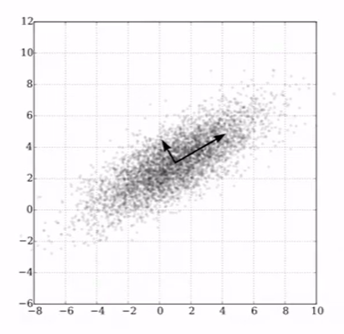
Vemos una distribución de puntos. 

Podemos suponer que cada uno de estos features se relaciona con una variable física de la variable a resolver.

Esta distribución de los datos se alinea con direccion formada en el espacio de los features (diagonal más grande).

La dirección en la cual se maximisa la varianza (la variación de los ejemplos) es la componente principal del problema. Habrá una segunda componente principal, perpendicular a la primera, la cual se alinea la variación máxima.

Entonces: consiste en encontrar las direcciones de varianza máx del problema, y hacer una transformacion sobre los datos para que queden definidos nuevos features (componentes) en los cuales la varianza sea máxima. El problema queda representado por **características más representativas** de la variacion de los ejemplos.

Se usa para reducir la dimensionalidad del problema. Vamos a tener tantas componentes principales como dimensiones en nuestro problema, las dimensiones de nuestro problema están asociadas con el número de features con los que contamos para cada uno de los ejemplos. Para un priblema de dimensionalidad = 2 obtenemos 2 componentes principales. Una de ellas es predominante con la variación de los datos ==> podemos proyectar todos los datos en una de las dimensiones y obviar la otra, entonces se reduce el problema 2D a 1D.

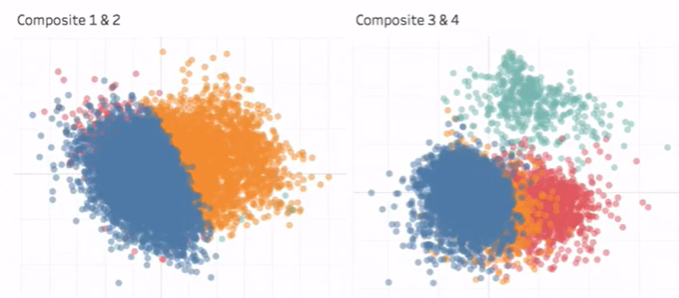
Tal vez, en algún espacio reducido de los componentes principales es más fácil entrenar un modelo que realice clustering en diferentes conjuntos que se pueden corresponder con una etiqueta.
___
Alguno de los features pueden no ser relevantes para el problema que nosotros necesitemos resolver. Lo que hacemos es rediseñar esos features como combinaciones lineales de los anteriores, y, quedarnos con alguno de estos fetures definidos (que lo llamamos *componente*), en el cual estamos **maximizando la varianza** de los datos respecto a esos componentes

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
(150, 4)
(150, 2)


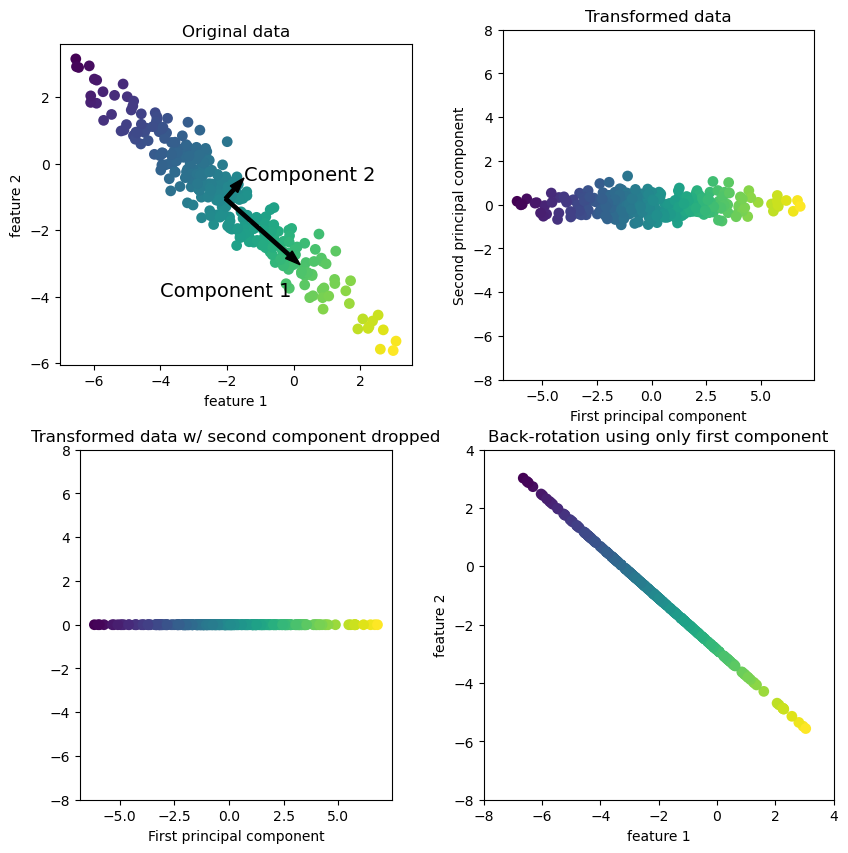

In [1]:
# usamos el módulo mg learn
import sklearn
import mglearn
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

iris = datasets.load_iris()
print(iris.feature_names)
datos = iris.data

# en particular, del submódulo plots llamamos a una ilustración educativa
# de cómo es el proceso de PCA
mglearn.plots.plot_pca_illustration()

# nos quedamos con los dos primeros componentes principales
# pasamos de 4 a 2 dimensiones
# pasamos de 150 ejemplos con 4 features a 150 ejemplos con 2 features
pca = PCA(n_components = 2) 
pca.fit(iris.data)

transformada = pca.transform(datos)
print(iris.data.shape)
print(transformada.shape)

# primer componente princial: el feature que maximiza la varianza
# No es solo una manera de detectar qué features son relevantes al problema,
# y cuáles son, sino también una manera de definir nuevos features que 
# hagan que los ejemplos varíen más significativamente al problema que
# queremos resolver.

# help(pca.transform)

Text(0, 0.5, 'Componente pca 2')

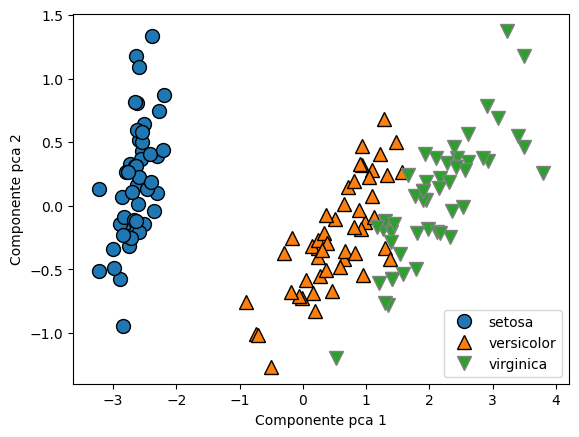

In [2]:
# graficamos usando la herramienta scatter discreto
mglearn.discrete_scatter(transformada[:,0], transformada[:,1], iris.target)
plt.legend(iris.target_names, loc = 'lower right')
plt.xlabel('Componente pca 1')
plt.ylabel('Componente pca 2')

Comparamos los datos transformados por pca
==
Comparamos la performance de un algoritmo de KMeans sobre los datos transformados mediante PCA.

0.7163421126838476


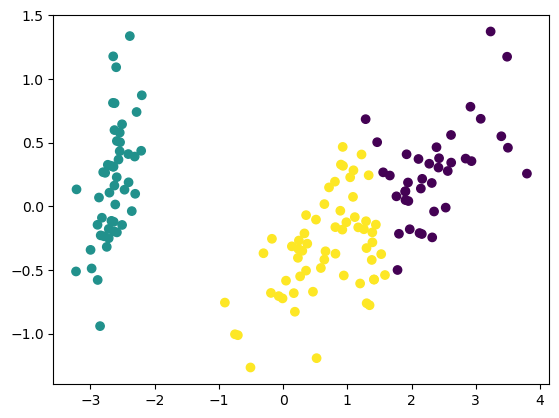

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn import metrics

iris = datasets.load_iris()
datos = iris.data
etiquetas = iris.target

# KMeans
k_means = KMeans(n_clusters = 3, max_iter = 2000) 
k_means.fit(transformada)
 
predicciones = k_means.predict(transformada)
 
score = metrics.adjusted_rand_score(etiquetas, predicciones)

print(score)
plt.scatter(transformada[:, 0], transformada[:, 1], c = predicciones)

plt.show()

Ahora, tratamos de usar un preprocesamiento del tipo MinMaxScaler. Lo que hacia era transformar el rango de variación de los features en la escala que va del 0 al 1. De esa manera nos permite comparar variables que pertenecen a distintas distribuciones.

A los datos ya transformados por PCA estamos simplificando aun más el problema

Text(0, 0.5, 'Componente pca 2')

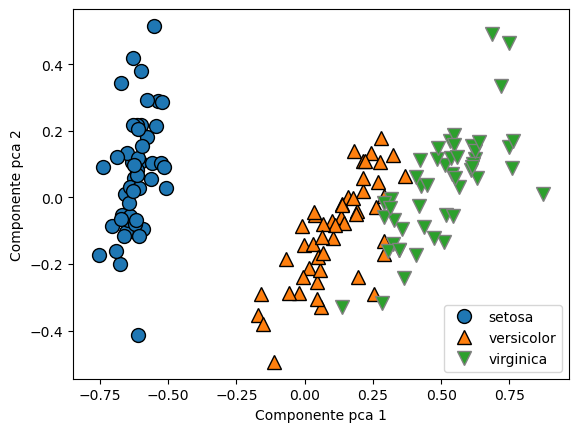

In [4]:
from sklearn.preprocessing import MinMaxScaler

escala = MinMaxScaler()
escala.fit(iris.data)

escalada = escala.transform(iris.data)
pca.fit(escalada)
transformada = pca.transform(escalada)

mglearn.discrete_scatter(transformada[:,0], transformada[:,1], iris.target)
plt.legend(iris.target_names, loc = 'lower right')

plt.xlabel('Componente pca 1')
plt.ylabel('Componente pca 2')

# ahora las componentes están acotdas a un rango mucho menor que sin el
# preprocesamiento de los datos.

El otro tipo de preprocesamiento que habíamos utilizado era el procesamiento de estandarizacion: centramos la media de distribución de probabilidad de cada feature en 0 y normalizar para obtener una varianza unitaria.

Text(0, 0.5, 'Componente pca 2')

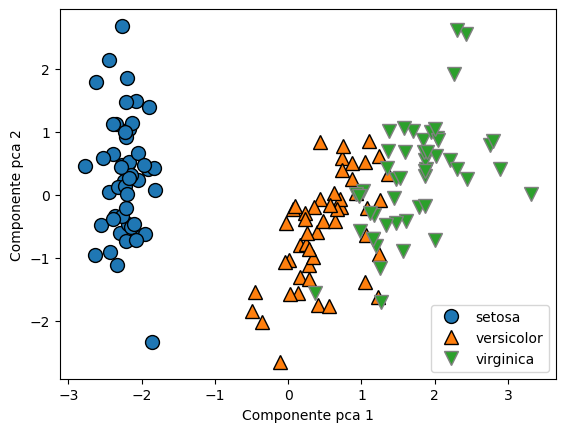

In [5]:
from sklearn.preprocessing import StandardScaler

escala = StandardScaler()
escala.fit(iris.data)
escalada = escala.transform(iris.data)
pca.fit(escalada)
transformada = pca.transform(escalada)
mglearn.discrete_scatter(transformada[:,0], transformada[:,1], iris.target)
plt.legend(iris.target_names, loc ='lower right')

plt.xlabel('Componente pca 1')
plt.ylabel('Componente pca 2')